In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('VESTL.csv', index_col=0, parse_dates=True)

In [3]:
from statsmodels.tsa.holtwinters import Holt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


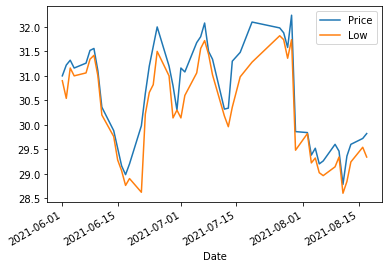

In [4]:
garan_close = df.drop(columns=['Open', 'High','Vol.','Change %'])
garan_close.plot()

In [5]:
garan_close = garan_close.sort_index()

In [6]:
garan_close =garan_close.reindex(pd.date_range(garan_close.index.min().to_datetime64(),garan_close.index.max().to_datetime64()))

In [7]:
garan_close.index.freq = 'D'

In [8]:
garan_close=garan_close.fillna(method='ffill')

In [9]:
garan_close

,Price,Low
2021-06-01,31.00,30.90
2021-06-02,31.22,30.54
2021-06-03,31.32,31.16
2021-06-04,31.16,31.00
2021-06-05,31.16,31.00
...,...,...
2021-08-13,29.60,29.24
2021-08-14,29.60,29.24
2021-08-15,29.60,29.24
2021-08-16,29.72,29.54


In [10]:
holt = Holt(garan_close['Price'])

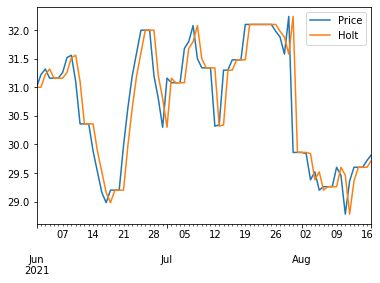

In [11]:
res_h = holt.fit()
garan_close['Holt'] = res_h.fittedvalues
garan_close[['Price', 'Holt']].plot()

In [12]:
N_test = 4
train = garan_close[:-N_test]
test = garan_close[-N_test:]

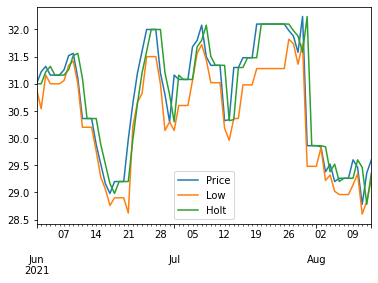

In [13]:
train.plot()

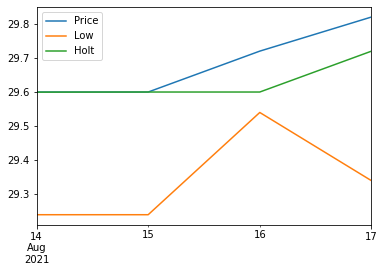

In [14]:
test.plot()

In [15]:
# boolean series to index df rows
train_idx = garan_close.index <= train.index[-1]
test_idx = garan_close.index > train.index[-1]

In [16]:
holt = Holt(train['Price'])
res_h = holt.fit()
garan_close.loc[train_idx, 'Holt_Forecast'] = res_h.fittedvalues

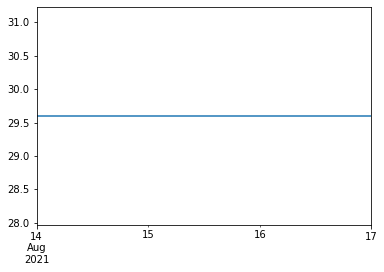

In [17]:
res_h.forecast(N_test).plot()

In [18]:
garan_close.loc[test_idx, 'Holt_Forecast'] = res_h.forecast(N_test)

In [19]:
alpha = 0.9
garan_close['EWMA'] = garan_close['Price'].ewm(alpha=alpha, adjust=False).mean()

In [20]:
garan_close['SMA-10'] = garan_close['Price'].rolling(10).mean()

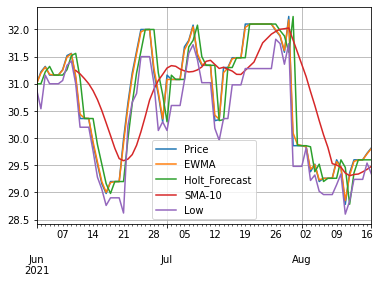

In [21]:
garan_close[['Price','EWMA','Holt_Forecast','SMA-10','Low']].plot().grid();
